# Via Monte Carlo

In [1]:
# Monte Carlo (etapa 1):
import random

def pi_monte_carlo(N):

    dentro_circulo = 0

    for _ in range(N):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)  # Gera pontos no quadrado [-1,1] x [-1,1]
        if x**2 + y**2 <= 1:  # Verifica se o ponto está dentro do círculo de raio 1
            dentro_circulo += 1

    estimativa_pi = 4 * (dentro_circulo / N)  # Calcula a estimativa de π
    return estimativa_pi

# Teste da função com diferentes valores de N
if __name__ == "__main__":
    for N in [100, 1000, 10000, 100000]:
        print(f"N = {N}, Estimativa de π: {pi_monte_carlo(N)}")


N = 100, Estimativa de π: 2.92
N = 1000, Estimativa de π: 3.136
N = 10000, Estimativa de π: 3.1216
N = 100000, Estimativa de π: 3.14652


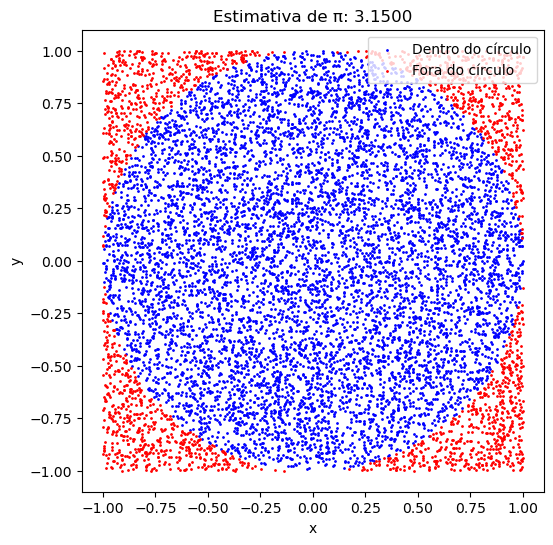

In [4]:
# via Monte Carlo (etapa 2)
import random
import matplotlib.pyplot as plt

def pi_monte_carlo(N, retorna_pontos=False):
    '''
    
    '''
    dentro = []
    fora = []
    pontos_dentro_circulo = 0

    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distancia = x**2 + y**2

        if distancia <= 1:
            pontos_dentro_circulo += 1
            dentro.append((x, y))
        else:
            fora.append((x, y))

    estimativa_pi = 4 * pontos_dentro_circulo / N

    if retorna_pontos:
        return estimativa_pi, dentro, fora
    else:
        return estimativa_pi

# Exemplo de uso:
N = 10000
estimativa_pi, dentro, fora = pi_monte_carlo(N, retorna_pontos=True)

# Plotando os pontos
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*dentro), color='blue', s=1, label='Dentro do círculo')
plt.scatter(*zip(*fora), color='red', s=1, label='Fora do círculo')
plt.title(f'Estimativa de π: {estimativa_pi:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

N =      10, π estimado = 3.600000, Erro relativo = 0.145916
N =     100, π estimado = 3.280000, Erro relativo = 0.044056
N =    1000, π estimado = 3.112000, Erro relativo = 0.009420
N =   10000, π estimado = 3.168000, Erro relativo = 0.008406
N =  100000, π estimado = 3.146600, Erro relativo = 0.001594
N = 1000000, π estimado = 3.142216, Erro relativo = 0.000198


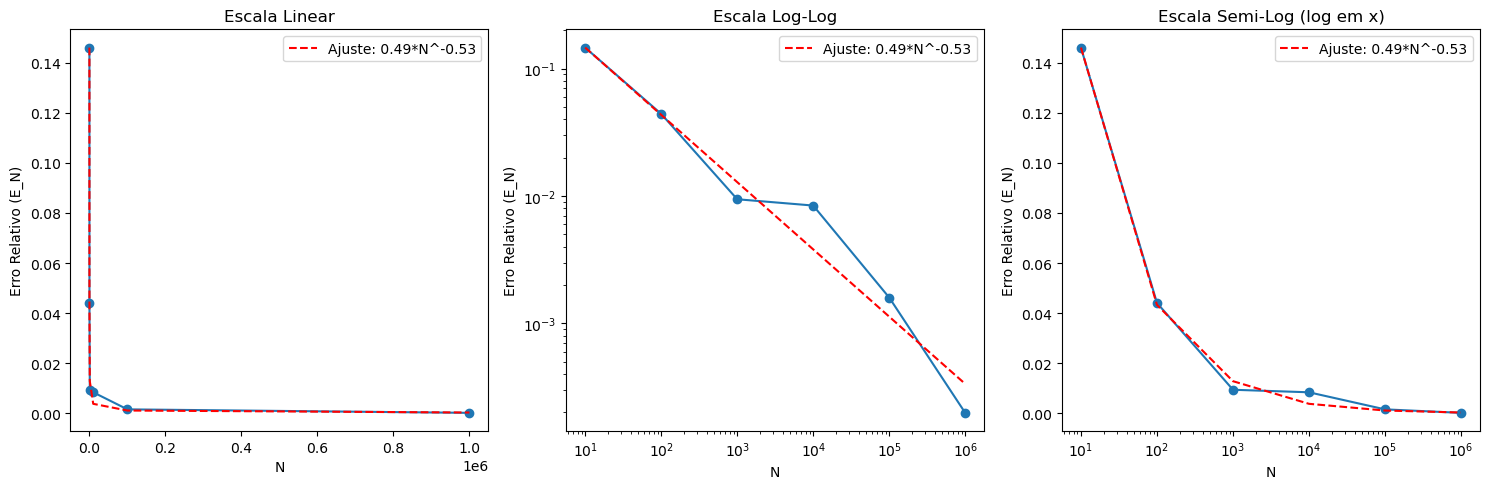

In [5]:
# via Monte Carlo (etapa 3):
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def estimar_pi(N):
    """Estima π usando o método Monte Carlo com N pontos."""
    pontos = np.random.rand(N, 2)  # Gera N pontos aleatórios no quadrado [0,1]×[0,1]
    dentro = np.sum(pontos[:,0]**2 + pontos[:,1]**2 <= 1)  # Pontos dentro do 1/4 de círculo
    return 4 * dentro / N  # Estimativa de π

# Valores de N para testar
Ns = np.logspace(1, 6, 6).astype(int)  # [10^1, 10^2, ..., 10^6]
pi_estimativas = []
erros_relativos = []

# Calcula π e o erro relativo para cada N
for N in Ns:
    pi_N = estimar_pi(N)
    pi_estimativas.append(pi_N)
    erro_rel = abs(np.pi - pi_N) / np.pi
    erros_relativos.append(erro_rel)
    print(f"N = {N:7d}, π estimado = {pi_N:.6f}, Erro relativo = {erro_rel:.6f}")

# Função para ajuste dos dados (lei de potência)
def power_law(x, a, b):
    return a * x**b

# Ajuste dos dados
params, _ = curve_fit(power_law, Ns, erros_relativos)
a, b = params

# Gráficos
plt.figure(figsize=(15, 5))

# 1. Escala linear
plt.subplot(131)
plt.plot(Ns, erros_relativos, 'o-')
plt.plot(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Linear')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

# 2. Escala log-log
plt.subplot(132)
plt.loglog(Ns, erros_relativos, 'o-')
plt.loglog(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Log-Log')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

# 3. Escala semi-log (log no eixo x)
plt.subplot(133)
plt.semilogx(Ns, erros_relativos, 'o-')
plt.semilogx(Ns, power_law(Ns, a, b), 'r--', label=f'Ajuste: {a:.2f}*N^{b:.2f}')
plt.title('Escala Semi-Log (log em x)')
plt.xlabel('N')
plt.ylabel('Erro Relativo (E_N)')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
#via Monte Carlo (etapa 4) :
import numpy as np

def pi_monte_carlo_vetorizado(N):
    pontos = np.random.uniform(-1, 1, size=(N, 2))

    distancias = np.sum(pontos**2, axis=1)

    dentro_circulo = np.sum(distancias <= 1)

    return 4 * dentro_circulo / N


if __name__ == "__main__":
    N_values = np.array([100, 1000, 10000, 100000])
    resultados = np.vectorize(pi_monte_carlo_vetorizado)(N_values)


    print(np.column_stack((N_values, resultados)))

[[1.00000e+02 2.84000e+00]
 [1.00000e+03 3.20400e+00]
 [1.00000e+04 3.12000e+00]
 [1.00000e+05 3.14728e+00]]


# Mapa logístico, caos e fractais

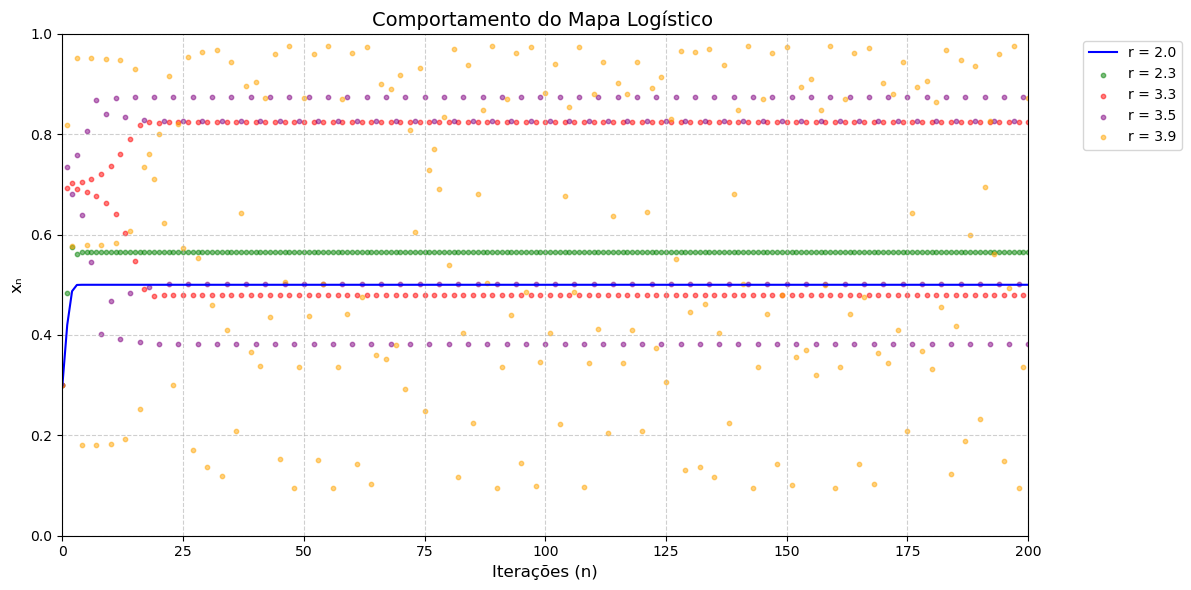

In [1]:
#Mapa logístico, caos e fractais (etapa 1):
import matplotlib.pyplot as plt
import numpy as np

def mapa_logistico(r, x0, N):
    x = [x0]
    for _ in range(N):
        x.append(r * x[-1] * (1 - x[-1]))
    return x

# Parâmetros
N = 200
x0 = 0.3
valores_r = [2.0, 2.3, 3.3, 3.5, 3.9]
cores = ['blue', 'green', 'red', 'purple', 'orange']


plt.figure(figsize=(12, 6))

for i, r in enumerate(valores_r):
    x = mapa_logistico(r, x0, N)
    if r == 2.0:
        plt.plot(range(N+1), x, color=cores[i], linewidth=1.5, label=f"r = {r}")
    else:
        plt.scatter(range(N+1), x, s=10, color=cores[i], alpha=0.5, label=f"r = {r}")

plt.title("Comportamento do Mapa Logístico ", fontsize=14)
plt.xlabel("Iterações (n)", fontsize=12)
plt.ylabel("xₙ", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  #
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, N)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\gfm050\AppData\Local\Temp\ipykernel_7176\2288607710.py:10: RuntimeWarning: overflow encountered in scalar multiply
  x[n] = r * x[n-1] * (1 - x[n-1])


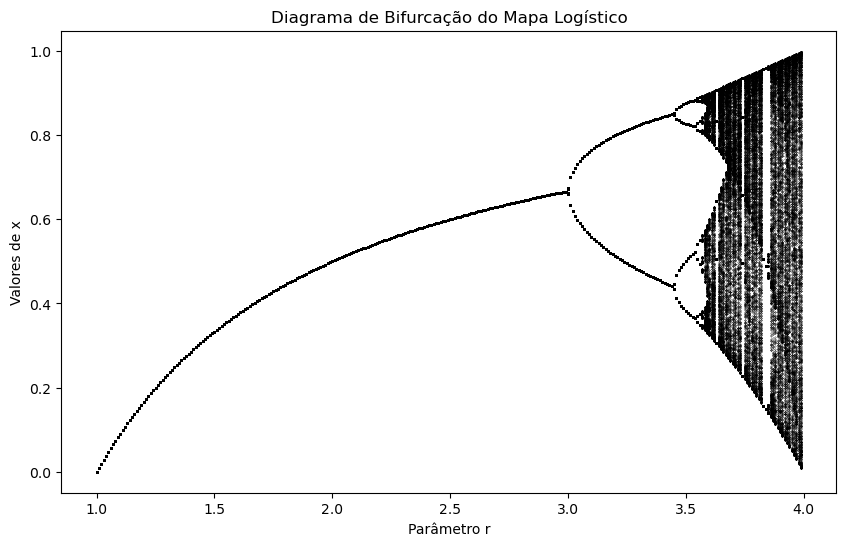

In [11]:
#Mapa Logístico (etapa)2:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r, x0, N):
    """Gera sequência do mapa logístico"""
    x = np.zeros(N)
    x[0] = x0
    for n in range(1, N):
        x[n] = r * x[n-1] * (1 - x[n-1])
    return x

# Parâmetros da simulação
N = 2000      # Número total de iterações
M = 1000      # Número de pontos para plotar (últimos M valores)
x0 = 0.5      # Valor inicial (pode ser qualquer valor entre 0 e 1)
r_values = np.arange(1, 4.01, 0.01)  # Valores de r de 1 a 4 em passos de 0.01

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.title("Diagrama de Bifurcação do Mapa Logístico")
plt.xlabel("Parâmetro r")
plt.ylabel("Valores de x")

# Simulação para cada valor de r
for r in r_values:
    xn = mapa_logistico(r, x0, N)
    plt.plot(r * np.ones(M), xn[-M:], 'k.', markersize=0.5)

plt.show()

In [16]:
#Mapa logístico, caos e fractais (etapa 3):
